<a id='top'></a>

# CSCI 3022: Intro to Data Science - Fall 2019 Practicum 2
***

This practicum is due on Canvas by **11:59 PM on Wednesday December 11**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  

**Here are the rules:** 

1. All work, code and analysis, must be your own. 
1. You may use your course notes, posted lecture slides, textbooks, in-class notebooks, and homework solutions as resources.  You may also search online for answers to general knowledge questions like the form of a probability distribution function or how to perform a particular operation in Python/Pandas. 
1. This is meant to be like a coding portion of your midterm exam. So, the instructional team will be much less helpful than we typically are with homework. For example, we will not check answers, help debug your code, and so on.
1. If something is left open-ended, it is because we want to see how you approach the kinds of problems you will encounter in the wild, where it will not always be clear what sort of tests/methods should be applied. Feel free to ask clarifying questions though.
2. You may **NOT** post to message boards or other online resources asking for help.
3. You may **NOT** copy-paste solutions *from anywhere*.
4. You may **NOT** collaborate with classmates or anyone else.
5. In short, **your work must be your own**. It really is that simple.

Violation of the above rules will result in an immediate academic sanction (*at the very least*, you will receive a 0 on this practicum or an F in the course, depending on severity), and a trip to the Honor Code Council.

**By submitting this assignment, you agree to abide by the rules given above.**

***

**Name**:  Sean McEachern

***


**NOTES**: 

- You may not use late days on the practicums nor can you drop your practicum grades. 
- If you have a question for us, post it as a **PRIVATE** message on Piazza.  If we decide that the question is appropriate for the entire class, then we will add it to a Practicum clarifications thread. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Bottom](#bot)

---

In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from calendar import month_name, different_locale
from scipy import stats
import statsmodels.api as sm
from scipy.special import binom

<br>

---
<a id='p1'></a>
[Back to top](#top)

### [40 points] Problem 1:  Amazon Forest Fires

A non-profit orgranization is trying to protect the Amazon rain forest and has recruited you as their head data scientist. For your first task, they've given you a dataset with the number of fires in each state in the Amazon region during each month between 1998 and 2017. They would like to have a 95% confidence interval for the true median number of forest fires that occur in each state on a yearly basis. 

In [197]:
#Starter Code
df = pd.read_csv('amazon.csv', thousands='.', decimal ='/', engine='python')
# df.head()
# df.count

**Part A:**  This dataset isn't paticularly useful in it's current state, so we'll need to clean it up a bit. Some data scientists say that most of their job is to wrangle data, so this will give you a taste of cleaning a real world data set. Perform the following tasks:
1. Drop the 'date' column. The only information this column holds is the year, which we already have in another column. 
2. Drop any rows with null values in any of the remaining columns
3. Print all the unique values of the 'month' column. You'll notice that one is encoded with a differant character encoding then the format that pandas is using.
3. Convert the Portugese month names to English month names. We've included the 'month_name' and the 'different_encoding' modules of the python calendar library in the top cell above, if you would like to use them. There are many ways to accomplish this task, and these modules are not required, but may make things easier. As part of this step, you should make sure that the Portugese month with the encoding problem is translated to the correct English month. 
4. Check the number column for any values that seem impossible. Drop any negative or fractional values, or any values over 50,000. 50,000 is large enough that no Brazilian state would ever have that many forest fires in one month, so we should get rid of anything above 50000. 
5. Since you're new on the job, some of your co-workers may have played a prank on you... Print out all the unique values of the 'year' column and drop any rows with values that don't make sense.
6. Find the total number of rows remaining after you've done all of the above and write it out in a markdown cell. if you have correctly performed all of the tasks above, your dataframe should now have 6438 rows.

**NOTE:** Since some of these tasks are not totally trivial, you may use any resources other than your classmates on this part of this problem. This means you may consult google, stack overflow, the python/pandas documentation, some random book on pandas you might have, etc... But you may not consult your classmates for help. ***CITE ALL RESOURCES USED IN A CODE COMMENT. A URL OR A BOOK TITLE IS SUFFICIENT. ANY CODE OBIVOUSLY COPIED FROM OUTSIDE SOURCES WITH OUT A CITATION WILL EARN YOU NO CREDIT ON THIS PROBLEM. YOU ARE ALLOWED TO USE THESE RESOURCES ONLY ON THIS PART OF THIS PROBLEM!***

In [198]:
#1
df_noDate = df.drop(['date'], axis = 1)
#2
df_noNull = df_noDate.dropna()
#3
df_noNull.month.unique()
#4
df_cleanMonth = df_noNull.replace(to_replace="Mar�o", value="March")
#5
df_cleanNeg = df_cleanMonth[df_cleanMonth.number >= 0]
df_cleanFrac = df_cleanNeg[(df_cleanNeg.number%1) == 0]
# df_cleanNumber = df_cleanNumber.round(0)
df_cleanNumber = df_cleanFrac[df_cleanFrac.number < 50000]
# #6
df_cleanYear = df_cleanNumber[df_cleanNumber.year != "1000bc"]
df_cleanYear = df_cleanYear[df_cleanYear.year != "-40"]
df_cleanYear = df_cleanYear[df_cleanYear.year != "10bc"]
df_clean = df_cleanYear[df_cleanYear.year != "our new data scientist won't notice this"]
# #7
df_clean.count


<bound method DataFrame.count of       year      state      month  number
0     1998       Acre    Janeiro     0.0
1     1999       Acre    Janeiro     0.0
2     2000       Acre    Janeiro     0.0
3     2001       Acre    Janeiro     0.0
4     2002       Acre    Janeiro     0.0
5     2003       Acre    Janeiro    10.0
6     2004       Acre    Janeiro     0.0
7     2005       Acre    Janeiro    12.0
8     2006       Acre    Janeiro     4.0
9     2007       Acre    Janeiro     0.0
10    2008       Acre    Janeiro     0.0
11    2009       Acre    Janeiro     0.0
12    2010       Acre    Janeiro     1.0
13    2011       Acre    Janeiro     0.0
14    2012       Acre    Janeiro     0.0
15    2013       Acre    Janeiro     0.0
16    2014       Acre    Janeiro     0.0
17    2015       Acre    Janeiro     1.0
18    2016       Acre    Janeiro    12.0
19    2017       Acre    Janeiro     0.0
20    1998       Acre  Fevereiro     0.0
21    1999       Acre  Fevereiro     0.0
22    2000       Acre  F

**#7 response**

My count = 6438

**Part B:** Extract the median number of forest fires per month, yearly, by state. Store these median values in the given python dictionary.

For Example:

If one year of one state had the following numbers of fires:

Jan: 1

Feb: 2

Mar: 3

Apr: 4

May: 5

Jun: 6

Jul: 7

Aug: 8

Sep: 9

Oct: 10

Nov: 11

Dec: 12

Then the median number of forest fires per month would be 6.5 (the average of the two middle elements since this has an even length)

If the state of "test" had 5 years of recorded data, with the following median forest fire values: \[1, 2, 7, 9, 3\],  then python dictionary should look like: 

\{

    "test": [1, 2, 7, 9, 3]
    
\}

Below we've given you one of the states values in a test, so you can ensure you are calculating the medians correctly.

In [199]:
#GIVEN DICTIONARY CODE
median_num_fires_monthly_yearly = {
    'Acre': None,
    'Alagoas': None,
    'Amapa': None,
    'Amazonas': None,
    'Bahia': None,
    'Ceara': None,
    'Distrito Federal': None,
    'Espirito Santo': None,
    'Goias': None,
    'Maranhao': None,
    'Mato Grosso': None,
    'Minas Gerais': None,
    'Para': None,
    'Paraiba': None,
    'Pernambuco': None,
    'Piau': None,
    'Rio': None,
    'Rondonia': None,
    'Roraima': None,
    'Santa Catarina': None,
    'Sao Paulo': None,
    'Sergipe': None,
    'Tocantins': None  
}

In [200]:
state_array = df_clean['state'].unique()
year_array = df_clean['year'].unique()

# state_array
# year_array


for i in state_array:
    states = df_clean[df_clean.state == i]
#     print(states)
    array = []   
  
    for j in year_array:
        years = states[states.year == j]
#         print(years)
        array.append(years['number'].median())
    
    
    if i == 'Sao Paulo':
        saoPlist = array
        
    median_num_fires_monthly_yearly[i] = array


In [201]:
#Given Test
assert median_num_fires_monthly_yearly['Acre'] == \
[1.5, 0.0, 1.0, 0.5, 1.0, 8.0, 7.0, 13.0, 6.0, 4.5, 0.0, 2.5, 6.0, 7.0, 5.0, 13.5, 12.0, 24.0, 33.5, 45.0] \
, "something is wrong here"

In [202]:
#DONT CHANGE THIS. WE USE IT TO MAKE THE OUTPUT LEGIBLE FOR GRADING
import pprint
pp = pprint.PrettyPrinter(indent=1)
pp.pprint(median_num_fires_monthly_yearly)

{'Acre': [1.5,
          0.0,
          1.0,
          0.5,
          1.0,
          8.0,
          7.0,
          13.0,
          6.0,
          4.5,
          0.0,
          2.5,
          6.0,
          7.0,
          5.0,
          13.5,
          12.0,
          24.0,
          33.5,
          45.0],
 'Alagoas': [0.0,
             4.0,
             7.5,
             3.0,
             13.0,
             12.5,
             6.5,
             11.5,
             8.0,
             4.5,
             18.0,
             21.5,
             10.5,
             20.0,
             24.5,
             14.5,
             12.5,
             36.0,
             13.5,
             8.5],
 'Amapa': [0.0,
           1.5,
           1.0,
           0.5,
           5.0,
           8.0,
           7.0,
           3.0,
           4.0,
           0.0,
           2.0,
           4.0,
           2.0,
           4.0,
           13.0,
           2.5,
           7.0,
           9.5,
           12.0,
           3.0

**Part C:** Since we cannot rely on the central limit thereom for the median, we'll bootstrap some samples. Bootstrap 1000 samples for each state. Each bootstrapped sample should have 50 values drawn from the original sample.

Find the median of each bootstrapped sample, and add it to a list. Save the list of median values for the states of **Sao Paulo** and **Goias**. We'll use them later to plot in part D. Then determine the 95% confidence interval of the true median from each list of bootstrapped medians for each state. Add a list of the low and high values of the confidence interval to the given python dictionary below. To help you check your work, the confidence interval of the state of Acre should be from roughly 4 to 7. Your values will change though, because each bootstrapped sample is picked randomly from the original.

For Example:

If the 95% confidence interval on the median is from 6 to 22 for the state of "test", then the dictionary would look like:

{

    "test": [6, 22]
    
}

In [203]:
#GIVEN CODE
median_num_fires_bootstrap = {
    'Acre': None,
    'Alagoas': None,
    'Amapa': None,
    'Amazonas': None,
    'Bahia': None,
    'Ceara': None,
    'Distrito Federal': None,
    'Espirito Santo': None,
    'Goias': None,
    'Maranhao': None,
    'Mato Grosso': None,
    'Minas Gerais': None,
    'Para': None,
    'Paraiba': None,
    'Pernambuco': None,
    'Piau': None,
    'Rio': None,
    'Rondonia': None,
    'Roraima': None,
    'Santa Catarina': None,
    'Sao Paulo': None,
    'Sergipe': None,
    'Tocantins': None  
}

In [204]:
sao_paulo = []
goias = []
for i in median_num_fires_monthly_yearly.keys():
    medians = []
    for j in range(1000):
        resample = np.random.choice(median_num_fires_monthly_yearly[i], 50, replace = True)
        resample_median = np.median(resample)
        medians.append(resample_median)
    median_num_fires_bootstrap[i] = [np.percentile(medians, 2.5),np.percentile(medians, 97.5)]
    if i == 'Sao Paulo':
        sao_paulo = medians
    if i == 'Goias':
        goias = medians

In [205]:
#DONT CHANGE THIS. WE USE IT TO MAKE THE OUTPUT LEGIBLE FOR GRADING
import pprint
pp = pprint.PrettyPrinter(indent=1)
pp.pprint(median_num_fires_bootstrap)

{'Acre': [4.5, 7.0],
 'Alagoas': [8.5, 13.0],
 'Amapa': [2.5, 4.0],
 'Amazonas': [57.5, 107.5],
 'Bahia': [233.5, 278.5],
 'Ceara': [38.0, 65.0],
 'Distrito Federal': [1.5, 2.0],
 'Espirito Santo': [8.5, 11.0],
 'Goias': [98.0, 166.5],
 'Maranhao': [620.5, 813.0],
 'Mato Grosso': [388.0, 543.0],
 'Minas Gerais': [136.0, 167.0],
 'Para': [471.5, 679.0],
 'Paraiba': [45.75, 58.0],
 'Pernambuco': [21.5, 30.5],
 'Piau': [193.0, 308.0],
 'Rio': [20.75, 29.5],
 'Rondonia': [41.0, 116.0],
 'Roraima': [44.5, 72.5],
 'Santa Catarina': [28.987500000000001, 43.5],
 'Sao Paulo': [111.5, 146.94999999999959],
 'Sergipe': [1.5, 5.0],
 'Tocantins': [171.0, 337.0]}


**Part D:** Plot a histogram of the frequency of different median values for the two states **Sao Paulo** and **Goias**. Overlay these histograms on the same plot. Include axis labels, a title, a legend, etc. Choose two colors that work well together and provide enough contrast (e.g. No one can see gold overlayed with yellow), and use reasonable values of the **alpha** parameter so you can see both histograms. Plot two vertical lines that represent the outer bounds of the 95% confidence interval on the true median for each state, in the same color as the state. Does the data for the median look normally distributed? Why or why not? Does this validate our decision to not use the central limit theorem and instead bootstrap our median samples? Explain in a markdown cell below.

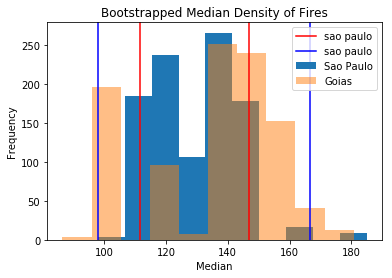

In [206]:
plt.hist(sao_paulo, label="Sao Paulo")
plt.axvline(x=median_num_fires_bootstrap['Sao Paulo'][0], color='red',label="sao paulo")
plt.axvline(x=median_num_fires_bootstrap['Sao Paulo'][1], color='red')

plt.hist(goias, label="Goias", alpha=0.50)
plt.axvline(x=median_num_fires_bootstrap['Goias'][0], color='blue',label="sao paulo")
plt.axvline(x=median_num_fires_bootstrap['Goias'][1], color='blue')

plt.title("Bootstrapped Median Density of Fires")
plt.xlabel("Median")
plt.ylabel("Frequency")
plt.legend()
plt.show()

**RESPONSE**
The data for the median does not look normally distributed because the data is tracked annually and there are yearly cycles that account for a distribution that is not a normal distibution. Therefore, we should not use the central limit theroem and we should bootstrap instead.

<br>

---
<a id='p2'></a>
[Back to top](#top)

### [40 points] Problem 2:  Sharknado Prediction

Governor Hickenlooper has charged you with the task of assessing the factors associated with sharknado risk in Colorado. As everyone knows, sharknadoes are a leading cause of sharknado-related illness, and you are a world-renowned data/shark scientist.

You decide to use multiple linear regression to understand and predict what factors lead to increased sharknado hazard. Your lead scientist, aptly named Fin, has collected lots of relevant data at a local sharknado hotspot, the Boulder Reservoir[\*](#footnote). The data cover a variety of sharknado-related environmental and other conditions, and you'll find this data in the file `sharknadoes.csv`. 

**Response**: 

- $\texttt{sharknado hazard}$: the hazard of a sharknado, where 1 is very unlikely and 100 is highly likely

**Features**: 

- $\texttt{taunts}$: the number of times over the past year that someone has taunted a shark
- $\texttt{clouds}$: what percentage of the sky was covered by clouds (fraction, 0-1)
- $\texttt{precipitation}$: amount of precipitation in the past 72 hours (inches)
- $\texttt{earthquake}$: the intensity of the most recent earthquake measured in the continental United States
- $\texttt{shark attacks}$: the number of shark attacks within 72 hours prior to the observation
- $\texttt{ice cream sold}$: the number of units of ice cream sold at the beach concession stand 
- $\texttt{misery index}$: an economic indicator for how miserable the average United States citizen is, based on the unemployment rate and the inflation rate. More [here](https://www.stuffyoushouldknow.com/podcasts/whats-the-misery-index.htm) and [here](https://en.wikipedia.org/wiki/Misery_index_(economics)). Higher values correspond to more miserable citizens.
- $\texttt{temperature}$: the outside temperature, measured in degrees Fahrenheit
- $\texttt{humidity}$: relative humidity (percent, 0-100)
- $\texttt{pizzas sold}$: the number of pizzas sold at the beach concession stand in the past year
- $\texttt{pressure}$: local air pressure (millibar) 
- $\texttt{octopuses}$: the number of octupuses in the vicinity on the day of the observation
- $\texttt{Zach's shoe size}$: the size of the shoes Zach was wearing when the observation was made
- $\texttt{Rachel's shoe size}$: the size of the shoes Rachel was wearing when the observation was made

**Part A**: Read the data from `sharknadoes.csv` into a Pandas DataFrame.  Note that since we will be doing a multiple linear regression we will need all of the features. To make sure the data is "clean", drop any row in the DataFrame that is missing data. 

In [207]:
df = pd.read_csv("sharknadoes.csv")
# df.head(25)
df_clean = df.dropna()
# df_clean.count
df_clean.head(5)

,clouds,earthquake,pizzas sold,taunts,pressure,shark attacks,octopuses,precipitation,misery index,ice cream sold,humidity,temperature,Zachs shoe size,Rachels shoe size,sharknado hazard
0,1.00,7.1,5560.0,15.0,847.12,2.0,7.0,0.824059,12.987180,273.0,86.41,78.0,42.0,9.0,40.22
1,1.00,7.4,5179.0,20.0,844.34,4.0,5.0,0.993296,16.765435,184.0,96.67,89.0,42.0,9.5,36.42
2,1.00,7.0,5227.0,0.0,839.48,9.0,2.0,1.173342,16.494518,141.0,53.85,65.0,9.5,9.0,19.54
3,0.13,7.9,5226.0,34.0,851.28,2.0,6.0,0.919291,8.277176,146.0,88.72,36.0,9.5,10.0,85.00
4,1.00,7.5,5491.0,6.0,852.67,2.0,4.0,1.729127,5.904750,178.0,63.08,72.0,42.0,9.0,56.34


**Part B**: Perform the appropriate statistical test at the $\alpha = 0.025$ significance level to determine if _at least one_ of the features is related to the the response $y$.  Clearly describe your methodology and show all computations in Python. 

In [208]:
#features
X = df_clean[["clouds", "earthquake", "pizzas sold", "taunts","pressure","shark attacks",
              "octopuses", "precipitation","misery index", "ice cream sold", "humidity",
              "temperature", "Zachs shoe size","Rachels shoe size"]]
#constant
X = sm.add_constant(X) 
#response
y = df_clean["sharknado hazard"]
#fit into Ordinary Least-Squares (OLS) model
model = sm.OLS(y, X).fit()


# print(model.params)
# sharknado hazard = (-2549.90) + (-1.51)*clouds + (2.51)*earthquake + (-0.001)*pizzas sold + (0.31)*taunts 
#                   + (3.06)*pressure + (-0.12)*shark attacks + (-0.07)*octopuses + (1.40)*precipitation 
#                   + (0.03)*misery index + (0.01)*ice cream sold + (0.02)*humidity + (-0.44)*temperature
#                   + (0.03)*zachs shoe size + (0.28)*rachels shoe size      
#
model.summary()
#
## used for analyzing correlation data between features 
# df_clean[["clouds", "earthquake", "pizzas sold", "taunts","pressure","shark attacks",
#               "octopuses", "precipitation","misery index", "ice cream sold", "humidity",
#               "temperature", "Zachs shoe size","Rachels shoe size"]].corr()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       sharknado hazard   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     179.4
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           9.60e-42
Time:                        17:45:33   Log-Likelihood:                -174.23
No. Observations:                  72   AIC:                             378.5
Df Residuals:                      57   BIC:                             412.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -2549.8985     67.605    -37.718      0.000   -2685.275   -2414.522
clouds               -1.5106      2.566     -0.589      0.558      -6.650       3.628
earthquake            2.5079      0.467      5.367      0.000       1.572       3.444
pizzas sold          -0.0006      0.002     -0.373      0.711      -0.004       0.003
taunts                0.3117      0.042      7.447      0.000       0.228       0.396
pressure              3.0688      0.079     38.850      0.000       2.911       3.227
shark attacks        -0.1151      0.144     -0.797      0.429      -0.404       0.174
octopuses            -0.0749      0.143     -0.524      0.602      -0.361       0.211
precipitation         1.3982      0.930      1.503      0.138      -0.464       3.261
misery index          0.0273      0.080      0.340      0.735      -0.133       0.188
ice cream sold        0.0096      0.008      1.193      0.238      -0.007       0.026
humidity              0.0188      0.027      0.706      0.483      -0.035       0.072
temperature          -0.4426      0.053     -8.396      0.000      -0.548      -0.337
Zachs shoe size       0.0271      0.023      1.175      0.245      -0.019       0.073
Rachels shoe size     0.2814      1.273      0.221      0.826      -2.268       2.831
==============================================================================
Omnibus:                        0.821   Durbin-Watson:                   2.225
Prob(Omnibus):                  0.663   Jarque-Bera (JB):                0.300
Skew:                           0.005   Prob(JB):                        0.861
Kurtosis:                       3.316   Cond. No.                     1.03e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**RESPONSE**

The computed p-value associated with the following features: the constant, earthquake, taunts, pressure, and temperature are below the $\alpha = 0.025$ significance level and are therefore likely related to the response.

Methodology: declare the features, response, and constant. Using the statsmodel.api library, pass all three variables into the ordinary least squares model and print the summary. Find the p-value in the data and compare them to the $\alpha = 0.025$ significance level.

**Part C**: Write a function `backward_select(df, resp_str, maxsse)` that takes in the DataFrame (`df`), the name of the column corresponding to the response (`resp_str`), and the maximum desired sum of squared errors (`maxsse`), and returns a list of feature names corresponding to the most important features via backward selection.  Use your code to determine the reduced MLR model with the minimal number of features such that the SSE of the reduced model is less than 570. At each stage in backward selection you should remove the feature that has the highest p-value associated with the hypothesis test for the given slope coefficient $\beta_k \neq 0$.

Your code should clearly indicate which feature was removed in each stage, and the SSE associated with the model fit before the feature's removal. _Specifically, please write your code to print the name of the feature that is going to be removed and the SSE before its removal_. Afterward, be sure to report all of the retained features and the SSE of the reduced model.

**Note**: The point of this exercise is to see if you can implement **backward_select** yourself.  You may of course use canned routines like statmodels OLS, but you may not call any Python method that explicitly performs backward selection.

In [263]:
def backward_select(df, resp_str, maxsse):
# assigns the features to X
    X = df.iloc[:, : -1]
# adds the constant    
    X = sm.add_constant(X)
# define the response as "sharknado hazard"    
    y = df[resp_str]
# fit OLS model
    model = sm.OLS(y, X).fit()
    
    while model.ssr < maxsse:
        feat = np.argmax(model.pvalues)
        print("Feature to be removed: ", feat)
        print("Current SSE value: ", model.ssr)
        
        # model stored before last iteration of 
        # loop because SSE value will go one drop too far
        model_best = model
        df_best = df
        
        df = df.drop(feat, axis = 1)
        
        #rebuild model after droping feature
        X = df.iloc[:, : -1]
        X = sm.add_constant(X)
        y = df[resp_str]  
        model = sm.OLS(y, X).fit()

    print("Final SSE: ",model.ssr)
    return df_best
        
            
    
back_sel = backward_select(df_clean, "sharknado hazard", 570)

Feature to be removed:  Rachels shoe size
Current SSE value:  532.94367074
Feature to be removed:  misery index
Current SSE value:  533.400341056
Feature to be removed:  octopuses
Current SSE value:  534.687569895
Feature to be removed:  clouds
Current SSE value:  536.506991126
Feature to be removed:  pizzas sold
Current SSE value:  539.496561636
Feature to be removed:  humidity
Current SSE value:  543.357200472
Feature to be removed:  shark attacks
Current SSE value:  547.414198287
Feature to be removed:  Zachs shoe size
Current SSE value:  552.154865382
Feature to be removed:  ice cream sold
Current SSE value:  564.106889524
Final SSE:  579.030316393


**RESPONSE**

Features to be retained : 

earthquake, taunts, pressure, precipitation, ice cream sold, temperature. 

The final SSE dropped one too many features. Therefore, the final SSE will be 564.10 and we should retain the ice cream sold feature.


**Part D**: Write down the final multiple linear regression model, including estimated parameters, obtained by your backward selection process. 

In [271]:
X = back_sel.iloc[:, : -1]
X = sm.add_constant(X)
y = back_sel['sharknado hazard']
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       sharknado hazard   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     450.3
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           6.28e-51
Time:                        19:39:46   Log-Likelihood:                -176.27
No. Observations:                  72   AIC:                             366.5
Df Residuals:                      65   BIC:                             382.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2542.0392     59.776    -42.526      0.000   -2661.420   -2422.659
earthquake         2.4012      0.435      5.520      0.000       1.532       3.270
taunts             0.3188      0.037      8.534      0.000       0.244       0.393
pressure           3.0618      0.071     42.836      0.000       2.919       3.205
precipitation      1.2559      0.885      1.419      0.161      -0.512       3.023
ice cream sold     0.0099      0.008      1.311      0.194      -0.005       0.025
temperature       -0.4680      0.033    -14.220      0.000      -0.534      -0.402
==============================================================================
Omnibus:                        1.389   Durbin-Watson:                   2.233
Prob(Omnibus):                  0.499   Jarque-Bera (JB):                0.798
Skew:                           0.210   Prob(JB):                        0.671
Kurtosis:                       3.300   Cond. No.                     1.50e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**RESPONSE**

$\hat{y} = $ -2542.03 + (2.4012)earthquake + (0.3188)taunts + (3.0618)pressure + (1.2559)precipitation + (0.0099)ice cream sold	 + (-0.4680)temperature

**Part E**: Perform the appropriate statistical test at the $\alpha = 0.025$ significance level to determine whether there is a statistically significant difference between the full model with all features and the reduced model obtained by backward selection in **Part D**. You may use output from your model fit above, but all calculations should be set up in Markdown/MathJax.

**RESPONSE**



**Part F**: Based on your conclusions in **Part E**, use the _better_ of the two models to predict the sharknado hazard when the following features are observed: 

- $\texttt{taunts}$: 47
- $\texttt{clouds}$: 0.8
- $\texttt{precipitation}$: 1 inch
- $\texttt{earthquake}$: 5
- $\texttt{shark attacks}$: 11
- $\texttt{ice cream sold}$: 120
- $\texttt{misery index}$: 15
- $\texttt{temperature}$: 70 degrees F
- $\texttt{humidity}$: 83
- $\texttt{pizzas sold}$: 5500
- $\texttt{pressure}$: 850 millibar 
- $\texttt{octopuses}$: 6
- $\texttt{Zach's shoe size}$: 9.5
- $\texttt{Rachel's shoe size}$: 9

**RESPONSE**

sharknado hazard = -2542.03 + (2.4012)*5 + (0.3188)*47 + (3.0618)*850 + (1.2559)*1 + (0.0099)*120 + (-0.4680)*70

sharknado hazard = 57.1735

**Part G:** Consider the model you used in Part E, and consider the fact that you are trying to predict **sharknado hazard**. What is one critical drawback to the MLR model (or any MLR model) for predicting shardnado hazard? What are some modifications that could improve on this issue?

**RESPONSE**

The model doesn't consider how much the features are related to each other. For example, if it is percipitating then it is cloudy so MLR really shouldn't be checking the correlation of both of these features. If the features were removed or combined together based off of their correlation the outcome could be improved.